In [145]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
%matplotlib inline
np.random.seed(42)

In [146]:
def draw(x1,x2):
    """ Draw a line from two vals """
    ln = plt.plot(x1,x2)

In [147]:
def sigmoid(score):
  return 1/(1+np.exp(-score))

In [148]:
def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

In [149]:
def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(1000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient

    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)

    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2)

In [150]:
Point = namedtuple('Point', 'x y')
n_pts = 1000
bias = np.ones(n_pts)
c_top = Point(10,12)
c_bot = Point(5,6)
top_range = np.array([np.random.normal(c_top.x,2,n_pts),np.random.normal(c_top.y,2,n_pts), bias]).T
bot_range = np.array([np.random.normal(c_bot.x,2,n_pts),np.random.normal(c_bot.y,2,n_pts), bias]).T
# combine both to one dataset using np.stack
all = np.vstack((top_range,bot_range))

In [151]:
# Eqaution to fit is:
# w1x1 + w2x2 + b = 0
# x2 = -b / w2 + x1*(-w1/w2)

# start vals:
# w1 = -0.1
# w2 = -0.28
# b = 3.5
line_params = np.matrix(np.zeros(3)).T
# x1 = np.array([ bot_range[:,0].min(), top_range[:,0].max()])
# #x2 = -b/w2 + (x1*(-w1/w2))
# x2 = -b/w2 + (x1*(-w1/w2))
# geneate labels matrix with ones and zeros:
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)


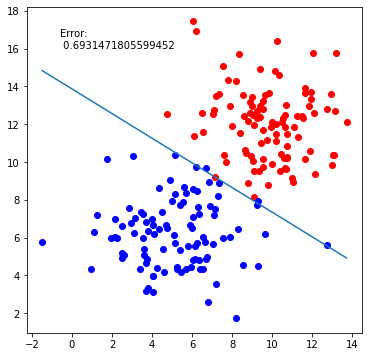

In [152]:
_, ax = plt.subplots(figsize=(6,6))
ax.scatter(top_range[:,0],top_range[:,1], color ='r')
ax.scatter(bot_range[:,0],bot_range[:,1], color ='b')
ax.text(0.1,0.9,f'Error: \n {str(calculate_error(line_params, all, y).item())}',horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
gradient_descent(line_params, all, y , 0.06)
# draw(x1,x2);

In [153]:
print(calculate_error(line_params, all, y))

[[0.69314718]]


In [155]:
130*.85

110.5